In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import xarray as xr
from scipy.interpolate import PchipInterpolator
from scipy.stats import linregress

import bambi as bmb

werbung = pd.read_csv("./data/Werbung.csv").drop(["Unnamed: 0"], axis=1)

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
model_t = bmb.Model("Verkauf ~ TV", werbung)
idata_t = model_t.fit(random_seed=123)
model_t

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, TV]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 89 seconds.


       Formula: Verkauf ~ TV
        Family: gaussian
          Link: mu = identity
  Observations: 200
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 14.0225, sigma: 25.8525)
            TV ~ Normal(mu: 0.0, sigma: 0.1519)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 5.2044)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

In [3]:
# Grafische visualisierung
model_t.graph(name="./bambi_linear_werbung_dag")

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
az.summary(idata_t)

In [ ]:
priors = {"TV": bmb.Prior("HalfNormal", sigma=3),
          "sigma": bmb.Prior("Gamma",  mu=1, sigma=2),
          }
a_model_wcp = bmb.Model("Verkauf ~ TV", werbung, priors=priors)
a_model_wcp

In [ ]:
no_intercept_model = bmb.Model("Verkauf ~ 0 + TV", werbung)
no_intercept_model

c:\Users\justi\anaconda3\envs\stoc\Lib\site-packages\arviz\rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
Default computed for conditional variable: TV
c:\Users\justi\anaconda3\envs\stoc\Lib\site-packages\arviz\rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
Default computed for conditional variable: TV


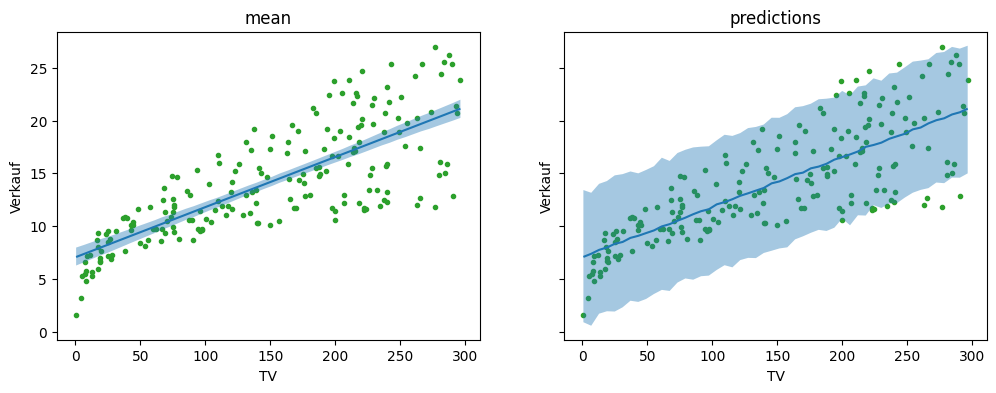

In [4]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 4)) 
bmb.interpret.plot_predictions(model_t, idata_t, "TV", ax=axes[0])
bmb.interpret.plot_predictions(model_t, idata_t, "TV", pps=True, ax=axes[1])
axes[0].plot(werbung.TV, werbung.Verkauf, "C2.", zorder=-3)
axes[1].plot(werbung.TV, werbung.Verkauf, "C2.", zorder=-3)
axes[0].set_title("mean")
axes[1].set_title("predictions");
plt.savefig("./bambi_linear_werbung_mean_pss.png")